# Machine Learning to forecast Bitcoin price movements
# Part 1: Obtaining, exploring and preparing the data

As with any other Machine Learning application, the first step is to get and prepare the data for our models. This notebook will focus in doing precisely this, explaining step by step the data obtained and using graphs to visualize these features. At the end of the notebook, we prepare clean data sets, which will be stored in the `data/` folder.

## Obtaining and labelling stock market data

As described in our project proposal, we will first use historical data from financial data as our data inputs. For this, we are going to use `yfinance` library, that scrapes this data from Yahoo Finance, returning it as a pandas dataframe, which will facilitate most of this work, and also we'll use `quandl`.

However, since the tickers mostly have special signs and we want to create an object for each ticker historical data, I'll first get the data and clear the name to get an appropiate object.

In [1]:
%pip install yfinance quandl

     |████████████████████████████████| 5.5 MB 19.6 MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=d590a70300157487c149637b5efeb2a29675a1683579e42a59e21f6da8fe8ad6
  Stored in directory: /home/ec2-user/.cache/pip/wheels/68/72/87/a384b8b8139f2489024464d6f5937e6acb2054c57d25519fb9
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=bc2423b36c37474a59198eef4e6011e1a00daa6b25cd4211e03c37b83395016f
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5e/8a/c4/59c699498647c7c94b14c87a904ca7540646107b3d94b7c320
Successfully built yfinance multitasking
  Attempting uninstall: lxml
    Found existing installation: lxml 4.5.0
    Uninstalling lxml-4.5.0:
      Successfully uninstalled lxml-4.5.0
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated 

In [2]:
# importing commonly used libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
tickers = ['SPY','^IXIC', 'GC=F', 'SI=F','CL=F', '^TNX',
           'BTCUSD=X','^N225','^ftse', 'EURUSD=X','000001.SS', '^HSI']
signs = ['=','^','-','.']
ma_values = [4,96,200]
rsi_values = {
    'k': 3,
    'd': 3,
    'alpha':14
}

def change_name(ticker):
    if ticker == 'tnx':
        x = 'rates'
    elif ticker == 'sif':
        x = 'silver'
    elif ticker == 'gcf':
        x = 'gold'
    elif ticker == 'ixic':
        x = 'nasdaq'
    elif ticker == 'clf':
        x = 'crude oil'
    elif ticker == 'btcusdx':
        x = 'btc'
    elif ticker == 'n225':
        x = 'nikkei'
    elif ticker == 'eurusdx':
        x = 'euro'
    elif ticker == '000001ss':
        x = 'shangai'
    else:
        x = ticker
    return x

def lower_clean_name(word, signs):
    word = word.lower()
    for char in signs: 
        word = word.replace(char, '')
    return word

# test change labels amongst indices

labels = [lower_clean_name(word,signs) for word in tickers]
changed_labels = [change_name(x) for x in labels]

for x in range(len(labels)):
    print(labels[x] +' = '+changed_labels[x])


spy = spy
ixic = nasdaq
gcf = gold
sif = silver
clf = crude oil
tnx = rates
btcusdx = btc
n225 = nikkei
ftse = ftse
eurusdx = euro
000001ss = shangai
hsi = hsi


In [4]:
ticker_concat = " ".join(tickers)
data_ohlc = yf.download(ticker_concat, start="2008-01-01")
data_ticker = yf.download(ticker_concat, start="2008-01-01", group_by='tickers')

[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  12 of 12 completed


In [5]:
data_ohlc.tail()

Adj Close                                                  \
              000001.SS      BTCUSD=X       CL=F  EURUSD=X         GC=F   
Date                                                                      
2020-12-25  3396.562988           NaN        NaN  1.218472          NaN   
2020-12-28  3397.284912           NaN  47.619999  1.220510  1877.199951   
2020-12-29  3379.035889           NaN  48.000000  1.222345  1879.699951   
2020-12-30  3414.452881           NaN  48.400002  1.225295  1891.000000   
2020-12-31  3473.069336  29003.685547  48.080002  1.229105  1897.900024   

                                                                            \
                 SI=F         SPY        ^FTSE          ^HSI         ^IXIC   
Date                                                                         
2020-12-25        NaN         NaN          NaN           NaN           NaN   
2020-12-28  26.459999  372.170013          NaN  26314.630859  12899.419922   
2020-12-29  26.138000  371.459991  6602.700195  26568.490234  12850.219727   
2020-12-30  26.488001  371.989990  6555.799805  27147.109375  12870.000000   
2020-12-31  26.650000         NaN  6474.330078  27231.130859           NaN   

                                       Close                           \
                   ^N225   ^TNX    000001.SS      BTCUSD=X       CL=F   
Date                                                                    
2020-12-25  26656.609375    NaN  3396.562988           NaN        NaN   
2020-12-28  26854.029297  0.933  3397.284912           NaN  47.619999   
2020-12-29  27568.150391  0.935  3379.035889           NaN  48.000000   
2020-12-30  27444.169922  0.926  3414.452881           NaN  48.400002   
2020-12-31           NaN    NaN  3473.069336  29003.685547  48.080002   

                                                                       \
            EURUSD=X         GC=F       SI=F         SPY        ^FTSE   
Date                                                                    
2020-12-25  1.218472          NaN        NaN         NaN          NaN   
2020-12-28  1.220510  1877.199951  26.459999  372.170013          NaN   
2020-12-29  1.222345  1879.699951  26.138000  371.459991  6602.700195   
2020-12-30  1.225295  1891.000000  26.488001  371.989990  6555.799805   
2020-12-31  1.229105  1897.900024  26.650000         NaN  6474.330078   

                                                                    High  \
                    ^HSI         ^IXIC         ^N225   ^TNX    000001.SS   
Date                                                                       
2020-12-25           NaN           NaN  26656.609375    NaN  3397.007080   
2020-12-28  26314.630859  12899.419922  26854.029297  0.933  3412.519043   
2020-12-29  26568.490234  12850.219727  27568.150391  0.935  3407.087891   
2020-12-30  27147.109375  12870.000000  27444.169922  0.926  3414.454102   
2020-12-31  27231.130859           NaN           NaN    NaN  3474.918213   

                                                                       \
                BTCUSD=X       CL=F  EURUSD=X         GC=F       SI=F   
Date                                                                    
2020-12-25           NaN        NaN  1.221300          NaN        NaN   
2020-12-28           NaN  48.959999  1.225200  1895.800049  26.820000   
2020-12-29           NaN  48.349998  1.227599  1881.300049  26.250000   
2020-12-30           NaN  48.660000  1.230875  1895.800049  26.525000   
2020-12-31  29003.685547  48.430000  1.231679  1904.900024  26.879999   

                                                                               \
                   SPY        ^FTSE          ^HSI         ^IXIC         ^N225   
Date                                                                            
2020-12-25         NaN          NaN           NaN           NaN  26716.609375   
2020-12-28  372.589996          NaN  26514.080078  12930.889648  26854.029297   
2020-12-29  374.000

In [6]:
# Renaming columns to changed labels

close = data_ohlc['Close'].fillna(method='ffill')
close.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)

In [7]:
close.columns

Index(['shangai', 'btc', 'crude oil', 'euro', 'gold', 'silver', 'spy', 'ftse',
       'hsi', 'nasdaq', 'nikkei', 'rates'],
      dtype='object')

## Returns and cumulative returns

To make stock prices comparable, we first need to bring all of them into the same base. For this, we will use the `daily returns` of holding this stock. This way, instead of comparing stocks with different prices (for example, Nikkei starting at 10k USD vs FTSE at 5k USD) we will bring all of them to the base of one at the start of the timeframe and record their daily increase or decrease in % to that base.

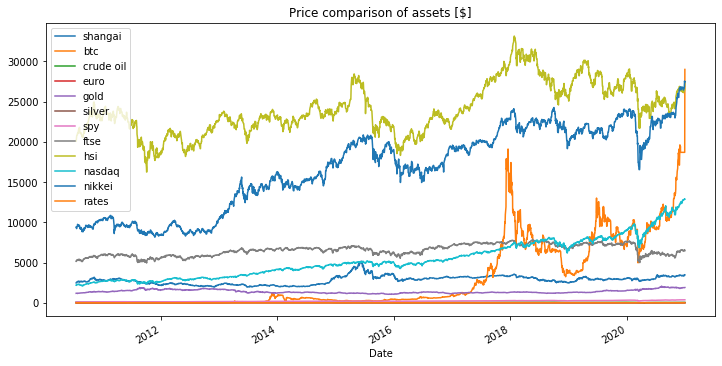

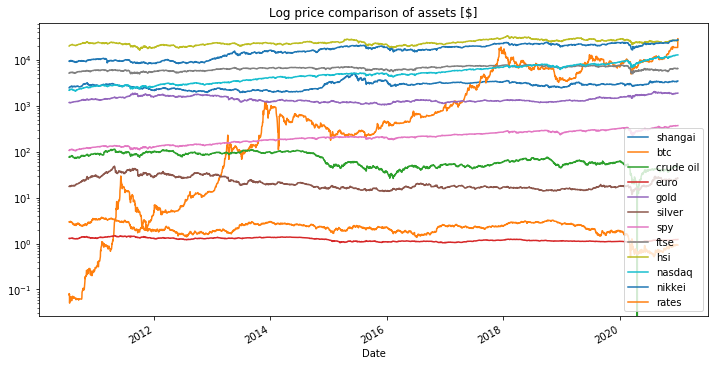

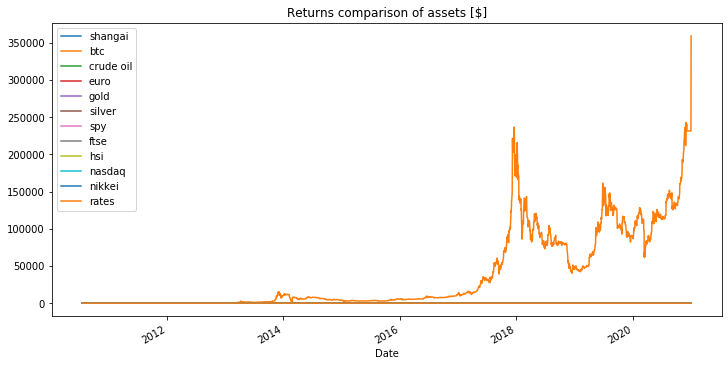

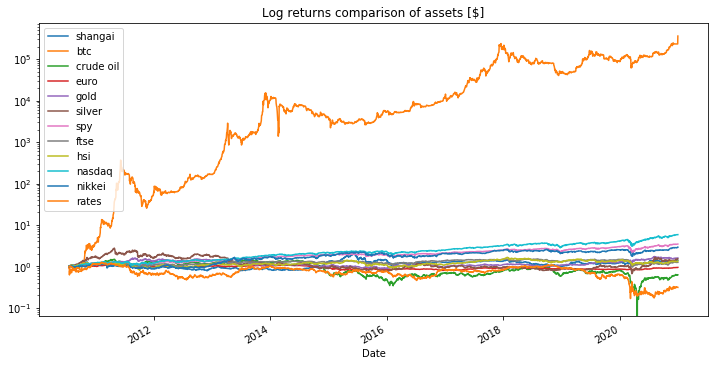

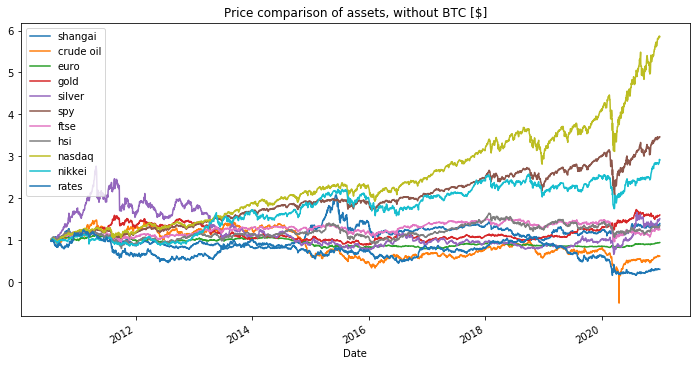

In [8]:
close = close[close.btc.notnull()]
returns = close.pct_change(1)
cumulative = (1 + returns).cumprod()
close.plot(figsize=(12,6),label='Price', title='Price comparison of assets [$]')
close.plot(figsize=(12,6),label='Price (log scale)', logy=True, title='Log price comparison of assets [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns', title='Returns comparison of assets [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns (log)', logy=True, title='Log returns comparison of assets [$]')
cumulative.loc[:,cumulative.columns != 'btc'].plot(
    figsize=(12,6), label='Cumulative Returns', title='Price comparison of assets, without BTC [$]')

Even by using returns as the base metric, we can see that we needed to plot them in a logarithmic scale, for their changes to be made comparable with Bitcoin, given the astonishing returns on the asset since 2010.

## Performing technical analysis calculations

Now we will calculate several indicators typically used in technical analysis of stock prices, such as simple moving averages, the (stochastic) relative strength index and other statistical measures s.a. the expanding standard deviation of Bitcoin price.

### Moving Averages

In [9]:
def transform_ma(data, ma1=4, ma2=96, ma3=200):
    data['MA'+str(ma1)] = round(data['Close'].rolling(ma1).mean(),0)
    data['MA'+str(ma2)] = round(data['Close'].rolling(ma2).mean(),0)
    data['MA'+str(ma3)] = round(data['Close'].rolling(ma3).mean(),0)    
    return data

### (Stochastic) Relative Strenght Index

In [10]:
def transform_rsi(data, alpha=14, smoothK=3, smoothD=3):
    
    data['change'] = data['Close'].pct_change(1)
    data['cum_change'] = (data['change']+1).cumprod()
    data['k'] = 0
    data['d'] = 0

    cond_k = data.change > 0
    cond_d = data.change < 0

    data['k'] = data.k.mask(cond_k, data['change'])
    data['d'] = data.d.mask(cond_d, - data['change'])
    # data['num'] = data['k'].rolling(alpha).mean()
    
    data['num'] = pd.Series.ewm(data['k'], span=alpha).mean()
    data['div'] = pd.Series.ewm(data['d'], span=alpha).mean()
    
    # data['div'] = data['d'].rolling(alpha).mean()
    data['rs'] = data['num']/data['div']
    data['RSI'] = (100 - (100/(1+data['rs'])))
    data['RSImin'] = data['RSI'].rolling(alpha).min()
    data['RSImax'] = data['RSI'].rolling(alpha).max()
    data['stochRSI'] = 100*(data['RSI'] - data['RSImin']) / (data['RSImax'] - data['RSImin'])
    data['smoothK'] = round(data['stochRSI'].rolling(smoothK).mean(),2)
    data['smoothD'] = round(data['smoothK'].rolling(smoothD).mean(),2)
    data['K1'] = data['smoothK'].shift(1)
    data['D1'] = data['smoothD'].shift(1)

    # cond_num_zero = data.num == 0
    # data['RSI'] = data.RSI.mask(cond_num_zero, 0)

    # cond_div_zero = data.div == 0
    # data['RSI'] = data.RSI.mask(cond_div_zero, 100)

    return data

def transform_std(df, confidence=80):
    df['btc_std_dev'] = df['change'].expanding(2).std()
    df['btc_mean'] = df['change'].expanding(2).mean()
    # df['conf_int_p'] = np.percentile(df['change'], (100-confidence)/2)
    # df['conf_int_m'] = np.percentile(df['change'], confidence + (100-confidence)/2)
    df['std_dif'] = (df['Close'] - df['btc_std_dev']).abs()

    return df

In [11]:
btc = data_ticker['BTCUSD=X']
btc = btc[btc.Close.notnull()]
btc = transform_std(transform_rsi(transform_ma(btc, ma_values[0], ma_values[1], ma_values[2])))
btc.head()

,Open,High,Low,Close,Adj Close,Volume,MA4,MA96,MA200,change,cum_change,k,d,num,div,rs,RSI,RSImin,RSImax,stochRSI,smoothK,smoothD,K1,D1,btc_std_dev,btc_mean,std_dif
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-07-19,0.08584,0.07723,0.09307,0.08080,0.08080,4900.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-20,0.08080,0.07426,0.08181,0.07474,0.07474,2000.0,NaN,NaN,NaN,-0.075000,0.925000,0.000000,0.075000,0.000000,0.040179,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-21,0.07474,0.06634,0.07921,0.07921,0.07921,4200.0,NaN,NaN,NaN,0.059807,0.980322,0.059807,0.000000,0.022847,0.024830,0.920113,47.919729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095323,-0.007596,0.016113
2010-07-22,0.07921,0.05050,0.08181,0.05050,0.05050,12900.0,0.0,NaN,NaN,-0.362454,0.625000,0.000000,0.362454,0.015857,0.128119,0.123769,11.013756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.215680,-0.125882,0.165180
2010-07-23,0.05050,0.05050,0.06767,0.06262,0.06262,14100.0,0.0,NaN,NaN,0.240000,0.775000,0.240000,0.000000,0.074336,0.094693,0.785019,43.978182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.253928,-0.034412,0.191308


In [12]:
btc.describe()

,Open,High,Low,Close,Adj Close,Volume,MA4,MA96,MA200,change,cum_change,k,d,num,div,rs,RSI,RSImin,RSImax,stochRSI,smoothK,smoothD,K1,D1,btc_std_dev,btc_mean,std_dif
count,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2.711000e+03,2708.000000,2616.000000,2512.000000,2710.000000,2710.000000,2711.000000,2711.000000,2711.000000,2711.000000,2710.000000,2710.000000,2697.000000,2697.000000,2697.000000,2695.000000,2693.000000,2694.000000,2692.000000,2709.000000,2709.000000,2709.000000
mean,2899.576005,2819.147428,2970.375267,2905.686883,2905.686883,7.473048e+09,2895.630724,2749.008028,2649.693073,0.007515,35974.742276,0.023068,0.015556,0.022926,0.015650,2.650842,57.576179,40.184898,73.151716,53.136376,53.119039,53.108997,53.122001,53.115461,0.103379,0.011017,2907.730936
std,4141.473705,4017.120694,4231.795026,4152.220949,4152.220949,2.745293e+10,4116.543427,3725.277951,3478.289086,0.091781,51393.713493,0.079793,0.036547,0.027275,0.014619,4.493211,19.322531,17.963015,15.712146,35.573542,32.300676,30.978181,32.306307,30.982121,0.016408,0.005368,4153.004526
min,0.050500,0.010000,0.056000,0.050500,0.050500,0.000000e+00,0.000000,0.000000,0.000000,-0.572057,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.463924,0.000000,0.000000,0.000000,0.000000,0.000000,0.075966,-0.125882,0.002232
25%,29.625001,29.150000,30.849999,29.700000,29.700000,0.000000e+00,30.000000,78.750000,82.750000,-0.014686,369.740102,0.000000,0.000000,0.009287,0.006350,0.795800,44.314520,27.213916,60.478591,20.155209,22.880000,23.610000,22.855000,23.607500,0.092876,0.008669,30.170553
50%,477.709991,460.449982,488.920013,477.709991,477.709991,4.482770e+07,478.000000,534.500000,494.000000,0.002123,5912.376294,0.002101,0.000000,0.015895,0.011501,1.294832,56.423816,39.789076,72.987065,55.310391,55.650000,55.630000,55.690000,55.650000,0.100444,0.010310,477.596815
75%,5960.283447,5815.232666,6238.324219,6088.680908,6088.680908,2.320975e+09,6076.000000,5750.000000,5928.500000,0.024104,75385.843324,0.024067,0.014675,0.027024,0.020218,2.568516,71.977149,52.552521,86.725697,87.032004,82.590000,81.870000,82.615000,81.880000,0.112103,0.012977,6093.569389
max,28840.953125,29003.685547,19845.994141,29003.685547,29003.685547,2.089610e+11,21587.000000,13048.000000,10637.000000,3.368390,358956.518274,3.368390,0.572057,0.510597,0.156999,64.826429,98.480853,92.111166,98.480853,100.000000,100.000000,100.000000,100.000000,100.000000,0.253928,0.030893,29003.593766


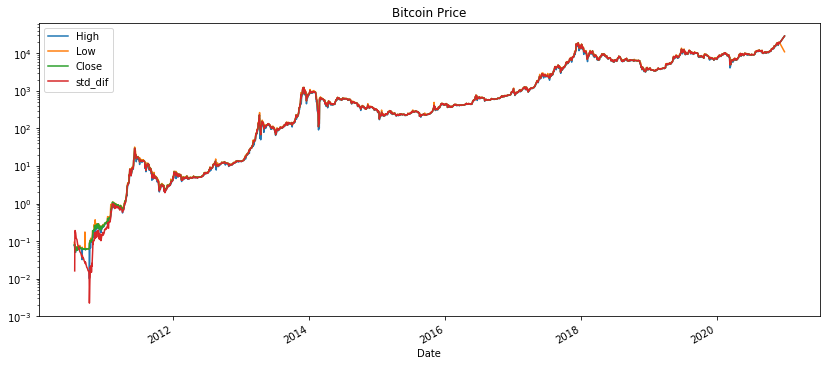

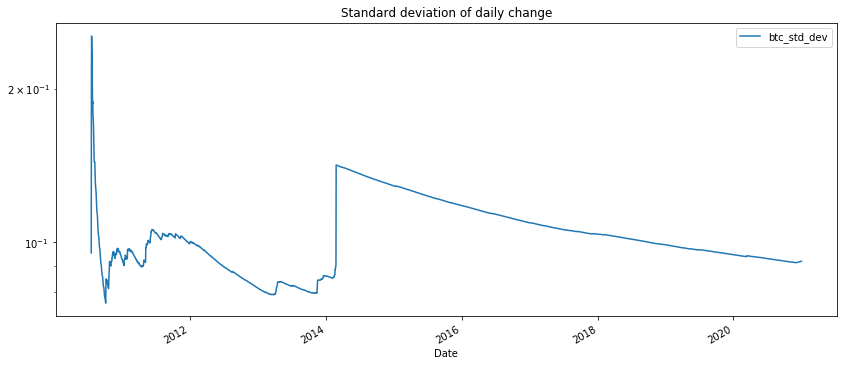

In [13]:
btc[['High','Low','Close','std_dif']].plot(figsize=(14,6),logy=True, title='Bitcoin Price')
btc[['btc_std_dev']].plot(figsize=(14,6), title='Standard deviation of daily change',logy=True)

In [14]:
# Initial selection of features to the model

btc = btc[[f'MA{ma_values[0]}',f'MA{ma_values[1]}', f'MA{ma_values[2]}', 'stochRSI', 'RSI','btc_std_dev','std_dif']].fillna(method='bfill')

In [15]:
data = pd.concat([cumulative, btc], axis=1)
data.drop(data.index[0], inplace=True)
# data

## Getting fundamental Bitcoin data

Fundamental Bitcoin's blockchain data will also be included, such as hashrate, mining difficulty, (daily) number of transactions and cost per transaction.

In [16]:
import quandl
# quandl.ApiConfig.api_key = '' # (insert if available, else there is a ratelimit)

In [17]:

# btc mining is an interesting source, but free data has not the same quality ;)
# btcmining = quandl.get('BITCOINWATCH/MINING') # total btc and marketcap, bad quality data
# btcmining.fillna(method='ffill').plot(legend=None, logy=True)

btc_hrate = quandl.get('BCHAIN/HRATE') # hashrate
btc_diff = quandl.get('BCHAIN/DIFF') # difficulty
btc_ntrat = quandl.get('BCHAIN/NTRAT') # number of transactions
btc_cptra = quandl.get('BCHAIN/CPTRA') # cost per transaction

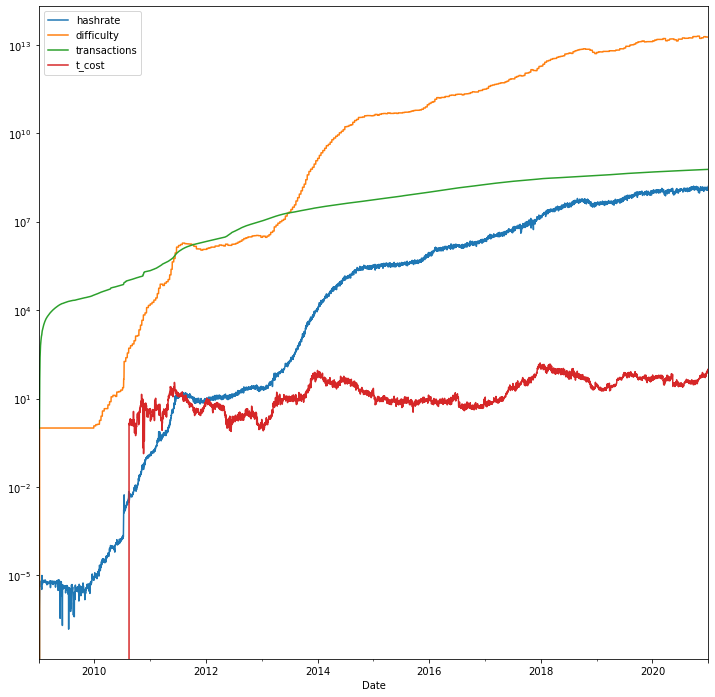

In [18]:
fundamentals = pd.concat([btc_hrate, btc_diff, btc_ntrat, btc_cptra], axis=1)
fundamentals.fillna(method='bfill')
fundamentals.columns = ['hashrate','difficulty','transactions','t_cost']
fundamentals.plot(figsize=(12,12), logy=True)

In [19]:
df = pd.concat([data,fundamentals], axis=1)
df = df[df.btc.notnull()]

## Normalizing functions for dataframes

In order to make sure that no feature becomes more important in the dataset than the others, we will create functions to normalize these and bring them back to the dataset's original state. This will be used later before saving the feed-in dataset.

In [20]:
def min_max_scaler(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df, df.min(), df.max()

def back_min_max(ndf,mindf,maxdf):
    df = ndf*(maxdf-mindf) + mindf
    return df

## Labelling buy, sell and no-trade signals

Following our end-goal, we will need to predict whether prices are going to go up or down. For this, the condition for the labels will be that if price goes up by more than a certain confidence level it's a buy, down a certain confidence level or less a sell, and values in between labelled as no-trade zone.

We will need to shift by one this values to become the predicted labels of our trained model.

In [21]:
returns.btc.describe()

count    2815.000000
mean        0.007235
std         0.090063
min        -0.572057
25%        -0.013514
50%         0.001245
75%         0.022982
max         3.368390
Name: btc, dtype: float64

Given the confidence intervals above, I will take the top 75% interval +2.3% as buy label (1), -1.36% for the sell label (2), and the values in between as no-trade (0). The objective of the classification problem will be to **predict the next day's label to give a trading signal**.

(array([  0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,
          1.,   1.,   0.,   1.,   2.,   0.,   1.,   0.,   1.,   3.,   2.,
          2.,   3.,   2.,   5.,   2.,   4.,   1.,   4.,   3.,   5.,   8.,
          7.,   1.,   7.,   7.,   9.,  12.,   6.,   9.,  11.,  20.,  17.,
         24.,  29.,  24.,  19.,  30.,  35.,  42.,  54.,  56.,  81., 108.,
        131., 181., 242., 355., 197., 145., 123., 107.,  99.,  68.,  33.,
         62.,  39.,  51.,  28.,  14.,  21.,  25.,  23.,  13.,  15.,  16.,
         15.,  13.,  12.,   5.,  12.,   7.,   5.,   9.,   2.,   7.,   9.,
          5.,   1.,   4.,   3.,   5.,   3.,   2.,   3.,   1.,   2.,   1.,
          1.,   0.,   1.,   0.,   3.,   0.,   2.,   1.,   3.,   1.,   1.,
          0.,   0.,   0.,   1.,   1.,   2.,   0.,   2.,   2.,   0.,   0.,
          1.,   0.,   0.,   0.,   0., 

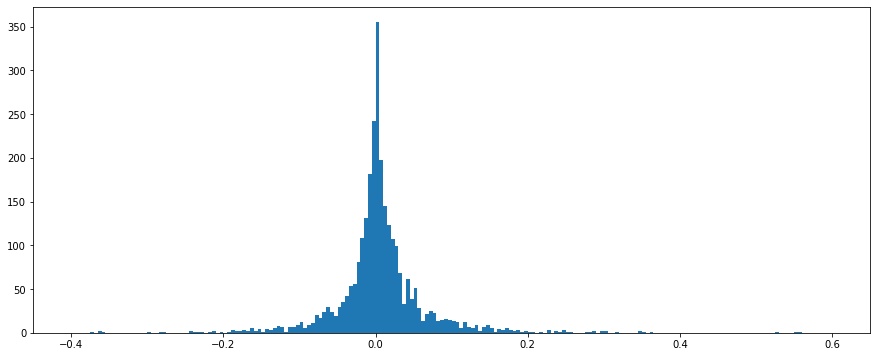

In [22]:
plt.figure(figsize = (15,6))
plt.hist(returns.btc, bins=200 , range=(-0.4, 0.6), label='Distribution of Bitcoin daily returns')

In [23]:
labels = 0

In [24]:
labels = pd.DataFrame(returns.btc)
labels['returns'] = returns.btc
labels = pd.concat([labels.returns, close.btc[close.btc.notnull()]], axis =1)
labels.rename(columns={'btc':'btc_close'}, inplace=True)

In [25]:
buy_cond = labels.returns > 0.022985 # returns.btc.describe()['75%']
sell_cond = labels.returns < -0.013636 # returns.btc.describe()['25%']

labels['c_label'] = 1
labels['c_label'] = labels['c_label'].mask(buy_cond, 2)
labels['c_label'] = labels['c_label'].mask(sell_cond, 0)


# Backtesting, used for later

labels['bkt_returns'] = 0
labels['bkt_returns'] = labels['bkt_returns'].mask(buy_cond, labels.returns)
labels['bkt_returns'] = labels['bkt_returns'].mask(sell_cond, labels.returns)

labels.head()

,returns,btc_close,c_label,bkt_returns
Date,,,,
2010-07-19,NaN,0.08080,1,0.000000
2010-07-20,-0.075000,0.07474,0,-0.075000
2010-07-21,0.059807,0.07921,2,0.059807
2010-07-22,-0.362454,0.05050,0,-0.362454
2010-07-23,0.240000,0.06262,2,0.240000


In [26]:
# row data cleaning
df.describe().loc['count'].min()

2710.0

### Data cleaning
I'll consider the minimal available records as starting point and select the training data. Dates afterwards will be test data. We will also get rid of NA values that aren't useful for our analysis.

In [27]:
df = pd.concat([df,labels], axis=1)
df.rename(columns={'btc':'btc_cumulative'}, inplace=True)

df = df[-int(df.describe().loc['count'].min()):]
df.describe()

,shangai,btc_cumulative,crude oil,euro,gold,silver,spy,ftse,hsi,nasdaq,nikkei,rates,MA4,MA96,MA200,stochRSI,RSI,btc_std_dev,std_dif,hashrate,difficulty,transactions,t_cost,returns,btc_close,c_label,bkt_returns
count,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2605.000000,2.710000e+03,2.710000e+03,2.710000e+03,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000
mean,1.142805,40696.447907,0.888022,0.935169,1.189137,1.200937,2.042131,1.282092,1.205235,2.552693,1.825481,0.727151,3010.122073,2760.616123,2555.097505,53.068137,57.535649,0.103294,3023.813800,2.487825e+07,3.420946e+12,1.903347e+08,26.369283,0.006946,3288.272863,1.000000,0.005395
std,0.212628,54593.030093,0.313044,0.084992,0.183061,0.401203,0.598594,0.128159,0.156174,1.085611,0.527882,0.219635,4155.893744,3728.841797,3450.825927,35.725962,19.368974,0.015311,4193.464684,4.053259e+07,5.593427e+12,1.896188e+08,26.035495,0.089790,4411.116660,0.702787,0.089636
min,0.787750,2.945545,-0.491638,0.803007,0.889227,0.669271,1.024606,0.960395,0.808835,1.062596,0.867315,0.168354,0.000000,0.000000,0.000000,0.000000,2.364873,0.078930,0.141614,9.683898e-02,1.225200e+04,2.078780e+05,0.765711,-0.572057,0.238000,0.000000,-0.572057
25%,0.952979,1500.618823,0.634244,0.863852,1.053102,0.923606,1.545624,1.170571,1.099587,1.632807,1.488777,0.601974,108.000000,87.000000,48.000000,19.596547,44.068809,0.093086,109.417800,2.227215e+02,2.616288e+07,2.084626e+07,6.754461,-0.013155,121.249996,1.000000,0.000000
50%,1.169709,7411.571829,0.783512,0.908586,1.117543,1.011720,1.955168,1.291999,1.179040,2.284950,1.929354,0.740216,573.000000,538.000000,473.000000,55.390410,56.528751,0.100807,569.962101,1.087804e+06,1.584272e+11,1.116892e+08,14.976309,0.001291,598.854980,1.000000,0.000000
75%,1.277860,81947.968908,1.216749,1.013587,1.332910,1.397029,2.553500,1.397709,1.320141,3.376107,2.275442,0.879470,6393.000000,5794.000000,5732.000000,87.240196,71.985708,0.112208,6349.797724,4.162949e+07,5.831157e+12,3.443895e+08,42.240082,0.022781,6621.395630,1.000000,0.000000
max,2.087059,358956.518274,1.488503,1.147194,1.736058,2.770845,3.469475,1.530117,1.650202,5.868094,2.930176,1.256748,21587.000000,13048.000000,10637.000000,100.000000,98.480853,0.141764,29003.593766,1.592460e+08,1.999734e+13,6.008946e+08,161.686071,3.368390,29003.685547,2.000000,3.368390


In [28]:
df.head()

,shangai,btc_cumulative,crude oil,euro,gold,silver,spy,ftse,hsi,nasdaq,nikkei,rates,MA4,MA96,MA200,stochRSI,RSI,btc_std_dev,std_dif,hashrate,difficulty,transactions,t_cost,returns,btc_close,c_label,bkt_returns
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-12-14,1.182456,3.053218,1.153384,1.035243,1.187780,1.697217,1.161991,1.144300,1.166256,1.195380,1.096553,1.165655,0.0,0.0,0.0,67.861079,58.982077,0.096720,0.149980,0.099275,12251.99976,207878.0,2.744510,0.073075,0.2467,2,0.073075
2010-12-15,1.176129,2.945545,1.157826,1.032574,1.172463,1.666762,1.156678,1.142552,1.143567,1.190603,1.095811,1.187584,0.0,0.0,0.0,57.239104,55.617121,0.096386,0.141614,0.109020,12251.99976,208488.0,3.621082,-0.035265,0.2380,0,-0.035265
2010-12-16,1.170766,3.094060,1.145806,1.021991,1.159685,1.640071,1.163389,1.142338,1.128308,1.199743,1.095971,1.173077,0.0,0.0,0.0,100.000000,59.434930,0.095996,0.154004,0.113283,12251.99976,209011.0,4.372600,0.050420,0.2500,2,0.050420
2010-12-17,1.168989,2.970297,1.149987,1.023223,1.166624,1.660374,1.158542,1.140532,1.130601,1.202317,1.095178,1.123482,0.0,0.0,0.0,80.235840,55.096559,0.095697,0.144303,0.105366,12251.99976,209514.0,4.385189,-0.040000,0.2400,0,-0.040000
2010-12-20,1.152499,3.304455,1.160308,1.017430,1.172463,1.673035,1.161338,1.144378,1.126830,1.205315,1.085886,1.129892,0.0,0.0,0.0,100.000000,63.696155,0.095713,0.171287,0.096839,12251.99976,211461.0,2.340739,0.112500,0.2670,2,0.112500


In [29]:
df.tail()

,shangai,btc_cumulative,crude oil,euro,gold,silver,spy,ftse,hsi,nasdaq,nikkei,rates,MA4,MA96,MA200,stochRSI,RSI,btc_std_dev,std_dif,hashrate,difficulty,transactions,t_cost,returns,btc_close,c_label,bkt_returns
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-25,1.372115,231432.776070,0.628691,0.941672,1.586443,1.472796,3.439277,1.262961,1.313356,5.825019,2.833290,0.322200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.169405e+08,1.867017e+13,599094619.0,76.981920,0.000000,18699.767578,1,0.000000
2020-12-28,1.372407,231432.776070,0.622158,0.943246,1.588559,1.509068,3.468823,1.262961,1.309775,5.868094,2.854273,0.314777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.373587e+08,1.867017e+13,599940609.0,89.104124,0.000000,18699.767578,1,0.000000
2020-12-29,1.365035,231432.776070,0.627123,0.944664,1.590674,1.490704,3.462205,1.282501,1.322411,5.845712,2.930176,0.315452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.479380e+08,1.860003e+13,600249266.0,96.083448,0.000000,18699.767578,1,0.000000
2020-12-30,1.379342,231432.776070,0.632349,0.946945,1.600237,1.510665,3.467145,1.273391,1.351211,5.854710,2.916998,0.312416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.405378e+08,1.859959e+13,600559694.0,83.913571,0.000000,18699.767578,1,0.000000
2020-12-31,1.403022,358956.518274,0.628168,0.949889,1.606076,1.519904,3.467145,1.257567,1.355393,5.854710,2.916998,0.312416,21587.0,13048.0,10637.0,82.306047,87.349201,0.091781,29003.593766,1.590296e+08,1.859959e+13,600894553.0,99.033068,0.551019,29003.685547,2,0.551019


In [30]:
# Fill NAs
df.fillna(method='ffill', inplace=True)

In [31]:
df['returns_label'] = df['c_label']
df['c_label'] = df['c_label'].shift(-1)
df['r_label'] = df['btc_close'].shift(-1)

df.tail()

,shangai,btc_cumulative,crude oil,euro,gold,silver,spy,ftse,hsi,nasdaq,nikkei,rates,MA4,MA96,MA200,stochRSI,RSI,btc_std_dev,std_dif,hashrate,difficulty,transactions,t_cost,returns,btc_close,c_label,bkt_returns,returns_label,r_label
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-25,1.372115,231432.776070,0.628691,0.941672,1.586443,1.472796,3.439277,1.262961,1.313356,5.825019,2.833290,0.322200,19037.0,12845.0,10536.0,15.795050,58.572370,0.091201,18699.676377,1.169405e+08,1.867017e+13,599094619.0,76.981920,0.000000,18699.767578,1.0,0.000000,1,18699.767578
2020-12-28,1.372407,231432.776070,0.622158,0.943246,1.588559,1.509068,3.468823,1.262961,1.309775,5.868094,2.854273,0.314777,19037.0,12845.0,10536.0,15.795050,58.572370,0.091201,18699.676377,1.373587e+08,1.867017e+13,599940609.0,89.104124,0.000000,18699.767578,1.0,0.000000,1,18699.767578
2020-12-29,1.365035,231432.776070,0.627123,0.944664,1.590674,1.490704,3.462205,1.282501,1.322411,5.845712,2.930176,0.315452,19037.0,12845.0,10536.0,15.795050,58.572370,0.091201,18699.676377,1.479380e+08,1.860003e+13,600249266.0,96.083448,0.000000,18699.767578,1.0,0.000000,1,18699.767578
2020-12-30,1.379342,231432.776070,0.632349,0.946945,1.600237,1.510665,3.467145,1.273391,1.351211,5.854710,2.916998,0.312416,19037.0,12845.0,10536.0,15.795050,58.572370,0.091201,18699.676377,1.405378e+08,1.859959e+13,600559694.0,83.913571,0.000000,18699.767578,2.0,0.000000,1,29003.685547
2020-12-31,1.403022,358956.518274,0.628168,0.949889,1.606076,1.519904,3.467145,1.257567,1.355393,5.854710,2.916998,0.312416,21587.0,13048.0,10637.0,82.306047,87.349201,0.091781,29003.593766,1.590296e+08,1.859959e+13,600894553.0,99.033068,0.551019,29003.685547,NaN,0.551019,2,NaN


## Correlation between all features and labels used

In [32]:
ndf, mindf, maxdf = min_max_scaler(df)

In [33]:
# Correlation of BTC with features

df.corr()['btc_cumulative']
# df.corr()['btc_close']

shangai           0.336871
btc_cumulative    1.000000
crude oil        -0.460467
euro             -0.373976
gold              0.307945
silver           -0.304668
spy               0.855759
ftse              0.400726
hsi               0.659207
nasdaq            0.887631
nikkei            0.741868
rates            -0.342301
MA4               0.997903
MA96              0.932365
MA200             0.881991
stochRSI         -0.060037
RSI              -0.012321
btc_std_dev      -0.241122
std_dif           1.000000
hashrate          0.830688
difficulty        0.826521
transactions      0.882569
t_cost            0.796375
returns          -0.005009
btc_close         1.000000
c_label          -0.031974
bkt_returns      -0.004658
returns_label    -0.003696
r_label           0.997226
Name: btc_cumulative, dtype: float64

In [34]:
# Normalized correlation does not change, uncomment below to see

# ndf.corr()['btc']

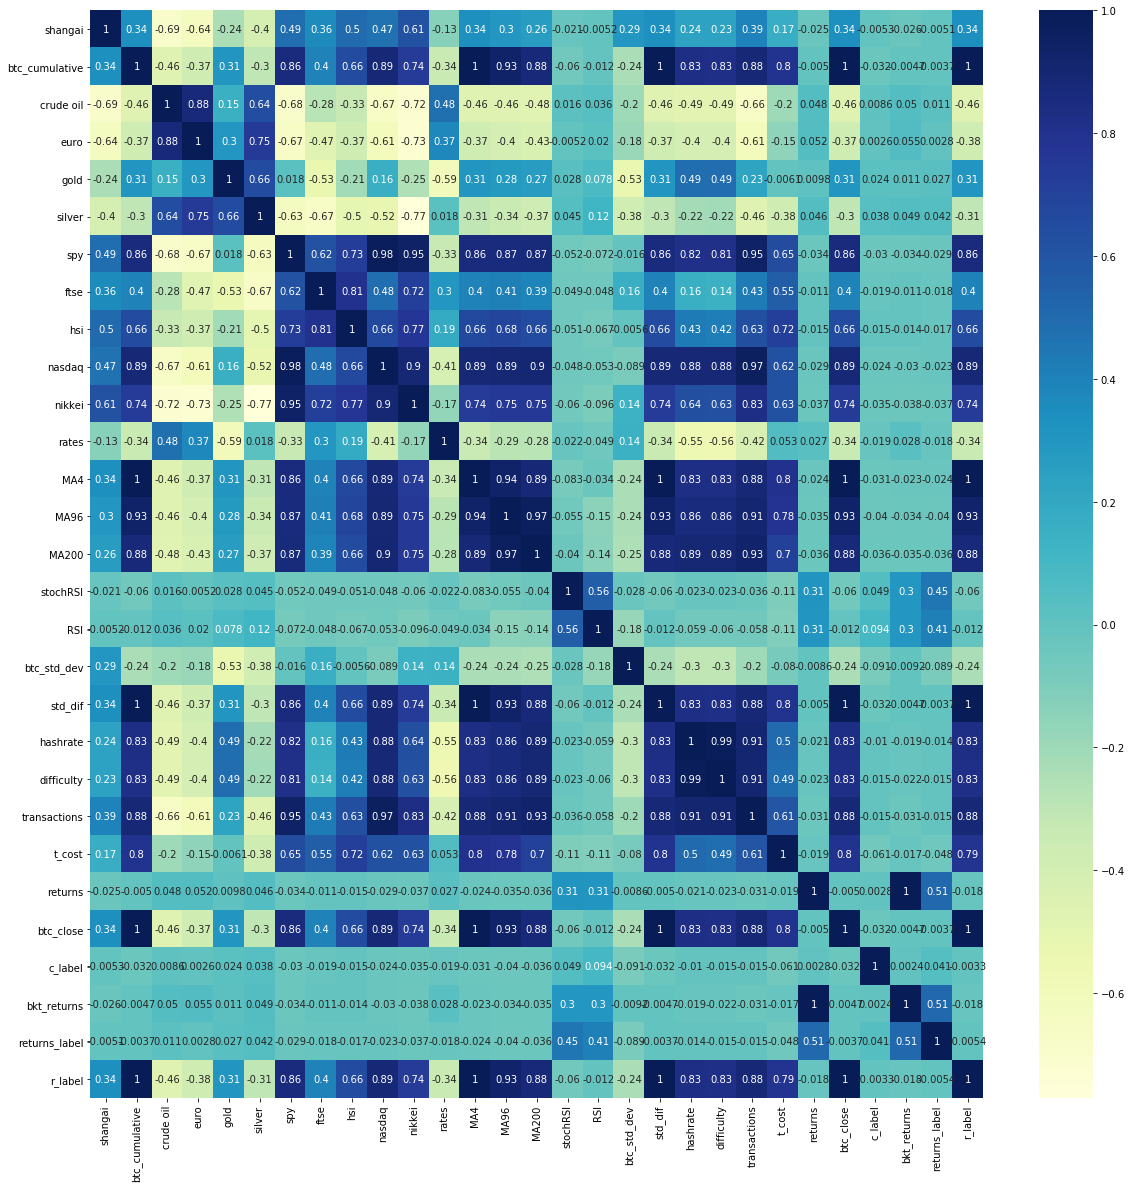

In [35]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, ax=ax,
            annot=True, 
            cmap="YlGnBu")

In [36]:
# Description of normalized features
print(ndf.shape)
ndf.describe()

(2710, 29)


,shangai,btc_cumulative,crude oil,euro,gold,silver,spy,ftse,hsi,nasdaq,nikkei,rates,MA4,MA96,MA200,stochRSI,RSI,btc_std_dev,std_dif,hashrate,difficulty,transactions,t_cost,returns,btc_close,c_label,bkt_returns,returns_label,r_label
count,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2710.000000,2709.000000,2710.000000,2710.000000,2709.000000
mean,0.273264,0.113367,0.696749,0.383985,0.354156,0.252985,0.416188,0.564656,0.471137,0.310082,0.464484,0.513415,0.151782,0.228222,0.259303,0.527269,0.573619,0.382446,0.113367,0.156225,0.171070,0.316516,0.159107,0.146938,0.113367,0.499815,0.146545,0.500000,0.113409
std,0.163647,0.152089,0.158092,0.246935,0.216172,0.190906,0.244837,0.224951,0.185619,0.225910,0.255898,0.201797,0.203110,0.295076,0.333644,0.357524,0.200006,0.240481,0.152089,0.254528,0.279709,0.315670,0.161791,0.022787,0.152089,0.351327,0.022748,0.351393,0.152102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.127167,0.004172,0.568587,0.176779,0.193515,0.121021,0.213107,0.368910,0.345571,0.118658,0.301262,0.398404,0.005652,0.008066,0.005570,0.186487,0.436448,0.224756,0.004173,0.000001,0.000001,0.034358,0.037216,0.141837,0.004172,0.500000,0.145176,0.500000,0.004178
50%,0.293971,0.020640,0.643969,0.306750,0.269611,0.162949,0.380618,0.582046,0.440004,0.254366,0.514838,0.525418,0.027864,0.042382,0.046536,0.547747,0.564727,0.335712,0.020638,0.006831,0.007922,0.185590,0.088308,0.145503,0.020640,0.500000,0.145176,0.500000,0.020642
75%,0.377208,0.228289,0.862761,0.611820,0.523933,0.346292,0.625348,0.767592,0.607709,0.481430,0.682609,0.653363,0.305728,0.513776,0.583224,0.870318,0.719710,0.515342,0.228288,0.261416,0.291597,0.572980,0.257732,0.150957,0.228289,0.500000,0.145176,0.500000,0.228326
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the data for training and testing

We will take as training data from beginning of time until 2018, and test data from 2018-01-01 onwards.

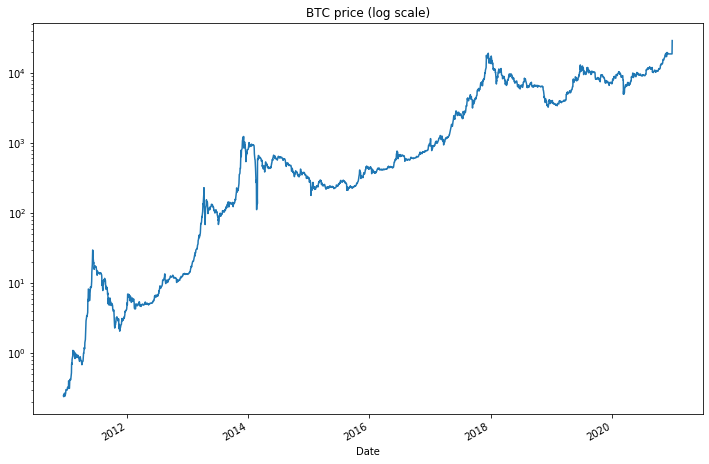

In [37]:
df.btc_close.loc[:].plot(figsize=(12,8), logy=True, title='BTC price (log scale)')

In [38]:
train_x = df.loc[:'2018-01-01']
train_nx = ndf.loc[:'2018-01-01']

test_x = df.loc['2018-01-01':]
test_nx = ndf.loc['2018-01-01':]

# Dropping last column of test (since they are shifted)
test_x.drop(test_x.index[-1], inplace=True)
test_nx.drop(test_nx.index[-1], inplace=True)

# Create labels for regression (price forecast) and classification (trading prediction)
train_y = train_x[['r_label', 'c_label']]
train_ny = train_nx[['r_label', 'c_label']]

test_y = test_x[['r_label', 'c_label']]
test_ny = test_nx[['r_label', 'c_label']]

test_x.tail()

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,shangai,btc_cumulative,crude oil,euro,gold,silver,spy,ftse,hsi,nasdaq,nikkei,rates,MA4,MA96,MA200,stochRSI,RSI,btc_std_dev,std_dif,hashrate,difficulty,transactions,t_cost,returns,btc_close,c_label,bkt_returns,returns_label,r_label
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-24,1.358603,231432.77607,0.628691,0.942188,1.586443,1.472796,3.439277,1.262961,1.313356,5.825019,2.834537,0.322200,19037.0,12845.0,10536.0,15.79505,58.57237,0.091201,18699.676377,1.429273e+08,1.867017e+13,598754278.0,76.930448,0.0,18699.767578,1.0,0.0,1,18699.767578
2020-12-25,1.372115,231432.77607,0.628691,0.941672,1.586443,1.472796,3.439277,1.262961,1.313356,5.825019,2.833290,0.322200,19037.0,12845.0,10536.0,15.79505,58.57237,0.091201,18699.676377,1.169405e+08,1.867017e+13,599094619.0,76.981920,0.0,18699.767578,1.0,0.0,1,18699.767578
2020-12-28,1.372407,231432.77607,0.622158,0.943246,1.588559,1.509068,3.468823,1.262961,1.309775,5.868094,2.854273,0.314777,19037.0,12845.0,10536.0,15.79505,58.57237,0.091201,18699.676377,1.373587e+08,1.867017e+13,599940609.0,89.104124,0.0,18699.767578,1.0,0.0,1,18699.767578
2020-12-29,1.365035,231432.77607,0.627123,0.944664,1.590674,1.490704,3.462205,1.282501,1.322411,5.845712,2.930176,0.315452,19037.0,12845.0,10536.0,15.79505,58.57237,0.091201,18699.676377,1.479380e+08,1.860003e+13,600249266.0,96.083448,0.0,18699.767578,1.0,0.0,1,18699.767578
2020-12-30,1.379342,231432.77607,0.632349,0.946945,1.600237,1.510665,3.467145,1.273391,1.351211,5.854710,2.916998,0.312416,19037.0,12845.0,10536.0,15.79505,58.57237,0.091201,18699.676377,1.405378e+08,1.859959e+13,600559694.0,83.913571,0.0,18699.767578,2.0,0.0,1,29003.685547


In [39]:
# Drop labels and unneeded columns on train & test feature data sets
drop_list = ['r_label','c_label','bkt_returns']
drop_df = [train_x, train_nx, test_x, test_nx]

for x in drop_df:
    x.drop(columns=drop_list, inplace=True)
#     x['ts'] = x['Date'].datetime.astype('int64') // 10**9
#     x.set_index('ts')
#     x.drop(columns=['ts'], inplace=True)

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Storing the data for future use

In [40]:
# Storing original and normalized data in CSVs
store_list = [train_x, train_nx, test_x, test_nx, train_y, train_ny, test_y, test_ny]
# !mkdir data
store_name = ['data/train_x.csv', 'data/train_nx.csv', 'data/test_x.csv', 'data/test_nx.csv', 'data/train_y.csv', 'data/train_ny.csv', 'data/test_y.csv', 'data/test_ny.csv']

for i in range(len(store_list)):
    store_list[i].to_csv(store_name[i])

## Recap and Discussion

### What was done?

We started by obtaining and preprocessing the data, specifically:
- Used Quandl and yfinance to source stock market, currencies and Bitcoin fundamentals. 
- Calculated technical analysis indicators, such as simple moving averages, relative strength index (RSI), stochastic RSI, cumulated standard deviation and distance to prices.
- Labelled data necessary to provide trading signal predictions later. These labels were selected according to the historical distribution of daily Bitcoin returns. 
- Created a heatmap to have an initial feeling of correlation between features.
- Cleaned up the data sets for NA values and stored training and testing data.

# What comes next?

In the next notebook, you will find the following sections:

- **Splitting the data** into test, train and labels
- **PCA for dimensionality reduction** / feature selection
- **XGBoost for price forecasting and trading signal**
- **Neural network for price forecasting and trading signal**
- **Final discussion and model comparisson**